   # Regresion Líneal y el método de los Mínimos Cuadrados Ordinarios

In [115]:
# importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
# carga de datos
df = pd.read_csv('./boston_dataset.csv')
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   MEDV     506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


ver graficamente la relacion entre el valor medio de la vivienda y el numero de habitaciones:

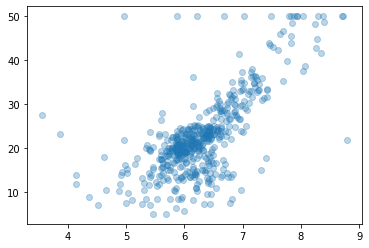

In [92]:
plt.scatter(df.RM, df.MEDV, alpha=0.3);

# Formula de regresion lineal en forma matricial

<img src="Regresion_lineal_matricial.png" alt="formula" style="width:600px;"/>

## $$Y = X.\beta + \mu$$

> donde:
>*  Y : es el vector de las variables dependientes
>*  X : es la matriz de las variables independientes
>*  $\beta$ : es el vector de parámetros del modelo de regresion lineal
>*  $\mu$ : es el vector de los errores

### El objetivo es minimizar la suma de todos los errores al cuadrado

## $$min[\Sigma (\mu{_i})^2] = min[ \mu^T\mu ]$$
Recordando la propiedad de matrices:
>* $ A^2 = A^T A $
>* $ (A^T)^{T} =A $
>*$ (AB)^T = B^T A^T $
>* $ (K)^T = K $ 
``( donde k es una constante)`` 

Se despeja $\mu$ de la formula de regresion lineal
# $$ \mu = Y - X.\beta$$
Se eleva al cuadrado ambos lados en forma matricial
## $$[\mu^T\mu] = [Y - X\beta ]^T[Y - X\beta ] $$
## $$ = [Y^T - (X\beta)^T ][Y - X\beta ] $$
## $$= [Y^T - \beta^T X^T ][Y - X\beta ] $$
Aplicando propiedad distributiva
## $$= [Y^T Y - Y^T X\beta - \beta^T X^T Y + \beta^T X^T X\beta ] $$








``Los terminos `` $[ Y^T X\beta ]$  ``y``  $ [ \beta^T X^T Y ]$ 
``resultan en valores escalares o constantes (fila x columna = 1x1).
Por lo que se aplica la propiedad de constante a cualquiera de los dos``
## $$= [Y^T Y - [ Y^T X\beta]^T - \beta^T X^T Y + \beta^T X^T X\beta ] $$

Se resuelve aplicando propiedad de traspuesta de producto
## $$= [Y^T Y - [ \beta^T X^T Y] - \beta^T X^T Y + \beta^T X^T X\beta ] $$
## $$= [Y^T Y - 2 \beta^T X^T Y + \beta^T X^T X\beta ] $$





Ahora se deriva la ecuacion respecto a $\beta$ y se iguala a cero para hallar el valor mínimo
## $$ 0 - 2X^T Y + 2\beta X^T X $$
##  $$ -2 X^T Y + 2\beta X^T X = 0$$

se simplifica - <s>2</s> $X^T Y + $ <s>2</s> $\beta X^T X = 0$ y se pasa término al otro lado de la igualdad
## $$ \beta X^T X = X^T Y$$

Finalmente se despeja $B$, que es el vector de parametros, y que cumplen con el mÍnimo error cuadratico medio
## $$ \beta =(X^T X)^{-1} X^T Y $$

# Se aplica el Método de los mínimos cuadrados ordinarios

Definimos las variables <b>X</b> e <b>Y</b> como matrices de numpy:

In [108]:
Xo = np.array(df.RM) # X original
Y =  np.array(df.MEDV)

AGREGAMOS el vector de UNOS a la matriz X:

In [94]:
ONES = np.ones(len(Xo))
X = np.array([ONES ,Xo]) # nueva X             
print(X.shape) 

(2, 506)


In [95]:
X = X.T # cambiamos filas por columnas para que la matriz X tenga la forma correcta
print(X.shape) 

(506, 2)


Aplicamos la formula del metodo de MINIMOS CUADRADOS ORDINARIO y se encuentra el vector $\beta$

In [96]:
B = np.linalg.inv(X.T @ X) @ (X.T) @ Y
print('B= [B0  B1 ... Bn] :')
print(B)

B= [B0  B1 ... Bn] :
[-34.65924312   9.09966966]


### Finalmente con los valores de $\beta$ hallados graficamos nuestro modelo sobre la grafica inicial

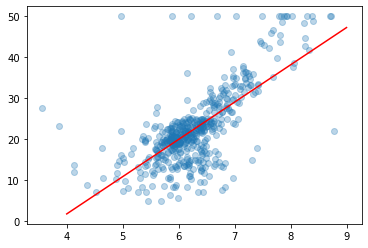

In [106]:
# GRAFICA INICIAL
plt.scatter(Xo,Yo, alpha= 0.3)

# DEFINIMOS la linea recta a graficar, desde x=4 hasta x=9
x0 = 4
x1 = 9
y0 = B[0] + B[1]*x0
y1 = B[0] + B[1]*x1

plt.plot( [x0, x1], [y0, y1], c = "red");